In [1]:
import torch

from synthetic.synthetic_interactive import synthesise
from synthetic.synthetic_ADP_vectorised import synthesise_ADP

from utils.split_data import split_to_4quadrants

from models.I import I
from models.ADP import ADP

In [2]:
seed_number = 1001

rng = torch.Generator()
rng.manual_seed(seed_number)

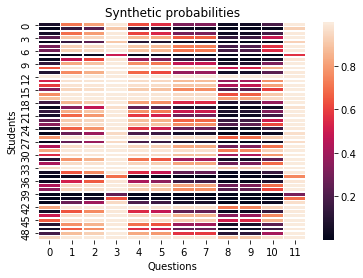

82.55593776702881
[[31.86701316  8.73535901]
 [ 8.70870537 50.68892245]]


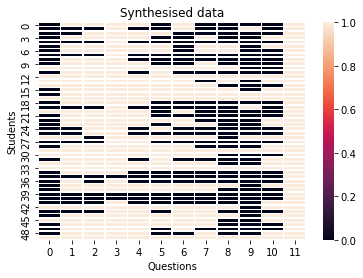

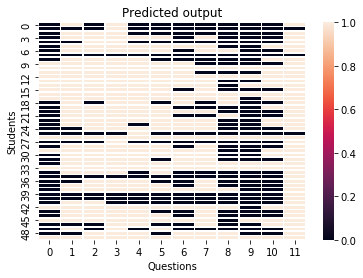

0 tensor(680182.5000, grad_fn=<NegBackward0>) tensor(75789.3125, grad_fn=<NegBackward0>) 57.232022285461426
25 tensor(499838.8125, grad_fn=<NegBackward0>) tensor(55424.6250, grad_fn=<NegBackward0>) 61.696505546569824
50 tensor(491585.5000, grad_fn=<NegBackward0>) tensor(54609.8828, grad_fn=<NegBackward0>) 61.908990144729614
75 tensor(483594.9062, grad_fn=<NegBackward0>) tensor(53820.4531, grad_fn=<NegBackward0>) 61.98599338531494
100 tensor(475861.1250, grad_fn=<NegBackward0>) tensor(53055.6523, grad_fn=<NegBackward0>) 62.10963726043701
125 tensor(468378.0938, grad_fn=<NegBackward0>) tensor(52314.9219, grad_fn=<NegBackward0>) 62.39838004112244
150 tensor(461139.6250, grad_fn=<NegBackward0>) tensor(51597.6953, grad_fn=<NegBackward0>) 62.55275011062622
175 tensor(454139.4375, grad_fn=<NegBackward0>) tensor(50903.3828, grad_fn=<NegBackward0>) 62.58680820465088
200 tensor(447371.1875, grad_fn=<NegBackward0>) tensor(50231.4023, grad_fn=<NegBackward0>) 62.82965540885925
225 tensor(440828.406

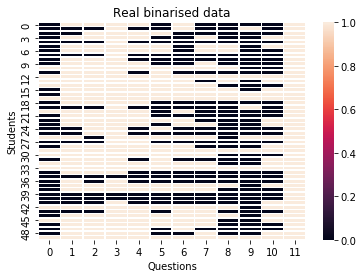

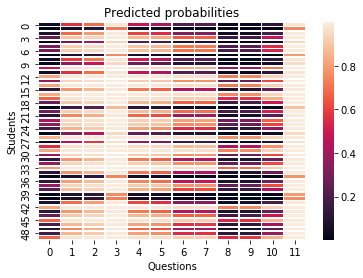

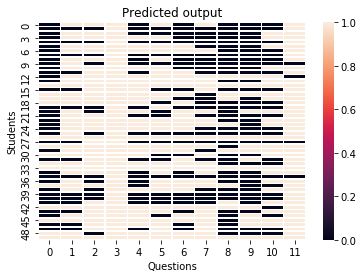

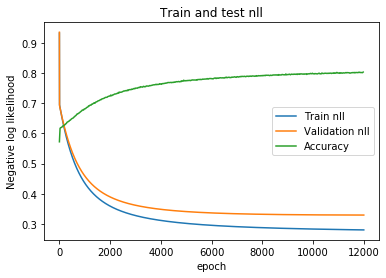

ADP vectorised (rate=0.0002, iters=12000, binarise=mid, shuffle=True) -> accuracy: 80.25409579277039, confusion matrix: 
[[30.73238269  9.86998949]
 [ 9.87591252 49.52171531]]


In [3]:
S = 45022
Q = 24

fake_data, bs_tensor_fake, bq_tensor_fake, portion_fake = synthesise_ADP(S, Q, rng)
first_quadrant, train_question_output_ts, train_student_output_ts, test_output_ts = split_to_4quadrants(fake_data, student_split=0.5, question_split=0.5)

testset_row_range, testset_col_range = [int(S/2), S], [int(Q/2), Q]
my_ADP = ADP(fake_data, testset_row_range, testset_col_range)
my_ADP.run(learning_rate=0.0002, iters=12500)

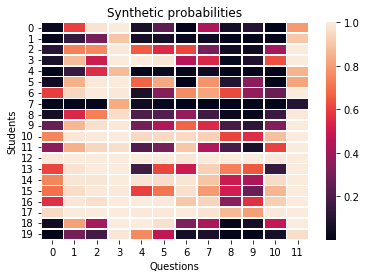

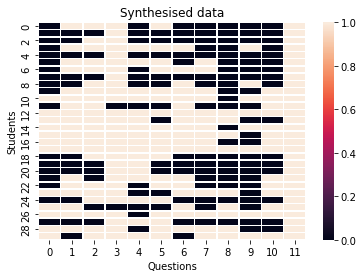

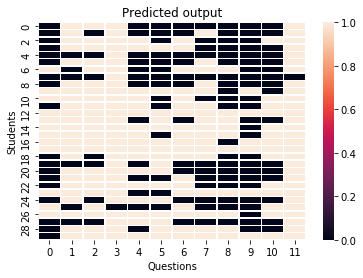

83.70463252067566
[[33.07012868  8.12898879]
 [ 8.16637792 50.63450461]]
0 tensor(781273.0625, grad_fn=<NegBackward0>) tensor(86922.2422, grad_fn=<NegBackward0>) 57.882845401763916 58.76941680908203
25 tensor(517805., grad_fn=<NegBackward0>) tensor(57550.9688, grad_fn=<NegBackward0>) 57.518136501312256 60.55225133895874
50 tensor(511477.1875, grad_fn=<NegBackward0>) tensor(56963.7500, grad_fn=<NegBackward0>) 58.29005241394043 60.70773005485535
75 tensor(505080.8125, grad_fn=<NegBackward0>) tensor(56398.0664, grad_fn=<NegBackward0>) 58.22232365608215 61.00202798843384
99 tensor(498389.3438, grad_fn=<NegBackward0>) tensor(55771.9453, grad_fn=<NegBackward0>) 61.00202798843384


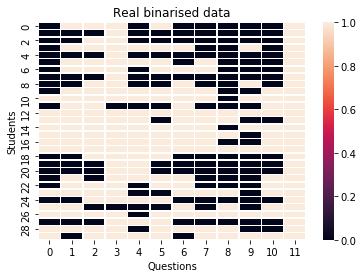

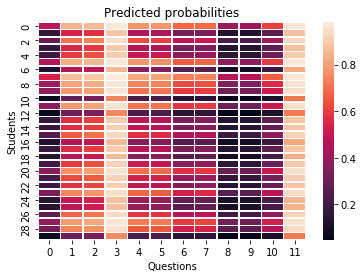

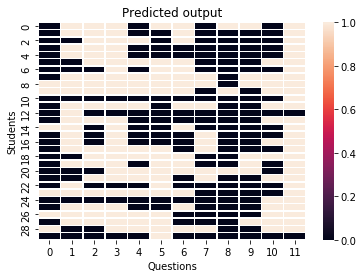

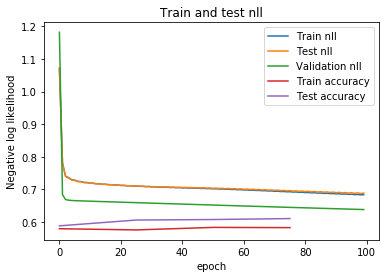

Interactive (rate=0.00025, iters=100) -> accuracy: 61.13455891609192, confusion matrix: 
[[21.88966875 19.30944871]
 [19.55599485 39.24488768]]


In [3]:
S = 45022
Q = 24
dimension = 2

fake_data, bs_fake, bq_fake, performance, conf_matrix = synthesise(S, Q, dimension, rng)
print(performance)
print(conf_matrix)

testset_row_range, testset_col_range = [int(S/2), S], [int(Q/2), Q]
my_I = I(fake_data, testset_row_range, testset_col_range)
my_I.run(learning_rate=0.00025, iters=10000, dimension=dimension, validation=0.9)
